In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


613

# Perform API Calls

#Perform a weather check on each city using a series of successive API calls.

#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [11]:
# Set url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#Define URL Query 
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [12]:
# Initialize list to store data from retrival
city_id = []
city_list = []
country = []
date = []
lat_list = []
lng_list = []
max_temp = []
wind = []
humidity = []
cloudiness = []

In [32]:
print("Beginning Data Retrieval ")
print("-----------------------------")

city_counter = 0
set_counter = 1

#loop thorugh the cities and append results to lists
for city in cities:

    response = requests.get(query_url + city).json() 

    try:
        city_id.append(response['id'])
        city_list.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max']) 
        wind.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
            
  
        if city_counter >= 49:
            city_counter = 0
            set_counter += 1
        else:
            city_counter +=1

        print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
   
    #print except message and skip
    except (KeyError, IndexError):
        print(f"City not found. Skipping...")
  
    

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | lyuban
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | unecha
Processing Record 9 of Set 1 | samarai
Processing Record 10 of Set 1 | stepnyak
Processing Record 11 of Set 1 | rawson
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | nikolskoye
City not found. Skipping...
Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | lavrentiya
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 

Processing Record 33 of Set 4 | bima
Processing Record 34 of Set 4 | grants
Processing Record 35 of Set 4 | grand gaube
Processing Record 36 of Set 4 | ilulissat
Processing Record 37 of Set 4 | ketchikan
Processing Record 38 of Set 4 | kaitangata
Processing Record 39 of Set 4 | general roca
Processing Record 40 of Set 4 | huarmey
Processing Record 41 of Set 4 | ponta delgada
Processing Record 42 of Set 4 | prachuap khiri khan
Processing Record 43 of Set 4 | tobol
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | cozumel
Processing Record 46 of Set 4 | mpika
Processing Record 47 of Set 4 | vila
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | thessalon
Processing Record 0 of Set 5 | ankazoabo
Processing Record 1 of Set 5 | bayir
City not found. Skipping...
Processing Record 2 of Set 5 | kununurra
Processing Record 3 of Set 5 | buhovo
Processing Record 4 of Set 5 | moranbah
Processing Record 5 of Set 5 | namatanai
Processing Record 6 of Set 5 | b

Processing Record 24 of Set 8 | nouakchott
Processing Record 25 of Set 8 | necochea
Processing Record 26 of Set 8 | chebsara
Processing Record 27 of Set 8 | polovinnoye
Processing Record 28 of Set 8 | riohacha
Processing Record 29 of Set 8 | gadsden
Processing Record 30 of Set 8 | bindura
Processing Record 31 of Set 8 | bestobe
Processing Record 32 of Set 8 | muroto
Processing Record 33 of Set 8 | parabel
Processing Record 34 of Set 8 | palana
Processing Record 35 of Set 8 | altea
Processing Record 36 of Set 8 | belaya gora
Processing Record 37 of Set 8 | awbari
Processing Record 38 of Set 8 | houma
Processing Record 39 of Set 8 | seymchan
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | marystown
Processing Record 42 of Set 8 | severnoye
Processing Record 43 of Set 8 | yamada
Processing Record 44 of Set 8 | kavaratti
Processing Record 45 of Set 8 | severo-kurilsk
Processing Record 46 of Set 8 | lubao
Processing Record 47 of Set 8 | lorengau
Processing Record 48 of 

In [35]:
len(cities)

613

In [36]:
#Convert to dataFrame
weather_df = pd.DataFrame({
    "ID" : city_id,
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Country" : country,
    "Date" : date})
weather_df.head()

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,2110227,Butaritari,3.0707,172.7902,28.04,76,93,3.64,KI,1619581972
1,4030556,Rikitea,-23.1203,-134.9692,24.85,74,100,5.21,PF,1619581761
2,625721,Lyuban',52.7985,28.0048,2.97,83,100,2.26,BY,1619581972
3,5983720,Iqaluit,63.7506,-68.5145,-9.00,92,20,1.58,CA,1619581973
4,4020109,Atuona,-9.8000,-139.0333,26.65,74,24,5.56,PF,1619582534


In [37]:
#Export dataframe to csv file
weather_df.to_csv("../output_data/cities.csv")

In [38]:
#display statistics for the dataframe
weather_df.describe()

,ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,1.174000e+03,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1.174000e+03
mean,2.650989e+06,19.347418,20.508856,16.251124,69.986371,55.361158,3.275750,1.619583e+09
std,1.613320e+06,33.689994,91.031855,10.679331,23.233163,37.760529,2.162219,7.245459e+02
min,5.365400e+04,-54.800000,-175.200000,-10.000000,5.000000,0.000000,0.150000,1.619582e+09
25%,1.508427e+06,-9.012200,-56.108050,8.000000,57.000000,20.000000,1.540000,1.619582e+09
50%,2.180815e+06,23.700000,24.291700,18.000000,76.000000,66.500000,2.790000,1.619583e+09
75%,3.533462e+06,47.686850,100.354300,24.760000,88.000000,90.000000,4.627500,1.619584e+09
max,7.601762e+06,78.218600,179.316700,38.630000,100.000000,100.000000,11.650000,1.619584e+09


In [43]:
#Inspect the data and remove the cities where the humidity > 100%.
#Skip this step if there are no cities that have humidity > 100%.
weather_city_df = weather_df[(weather_df["Humidity"] > 100)].index                                 
weather_city_df


Int64Index([], dtype='int64')

In [46]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

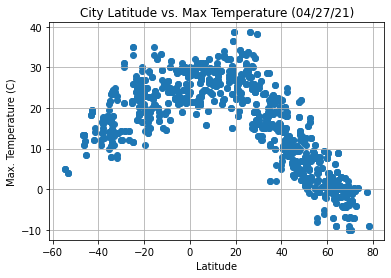

In [39]:
# Plot variables from dataframe
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

#labels
plt.title("City Latitude vs. Max Temperature (04/27/21)")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("../output_data/latitude_vs_maxtemp.png")
plt.show()

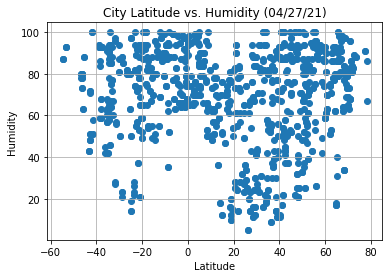

In [40]:
# Plot variables from dataframe
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")

#labels
plt.title("City Latitude vs. Humidity (04/27/21)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("../output_data/latitude_vs_humidity.png")
plt.show()

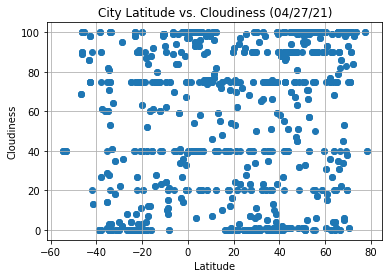

In [41]:
# Plot variables from dataframe
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

#labels
plt.title("City Latitude vs. Cloudiness (04/27/21)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("../output_data/latitude_vs_cloudiness.png")
plt.show()

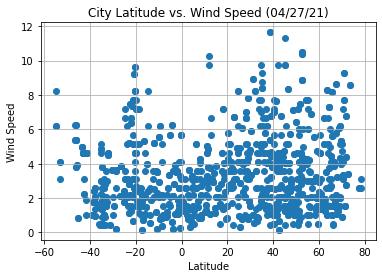

In [42]:
# Plot variables from dataframe
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")

#labels
plt.title("City Latitude vs. Wind Speed (04/27/21)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save and show plot
plt.savefig("../output_data/latitude_vs_windspeed.png")
plt.show()

In [ ]:
#Linear Regression
#create function for linear regression and scatter plot

Def linear_regression(x_values, y_values, title, text_coordinates):
    
    #Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [ ]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
